In [1]:
# lasso documentation
#http://scikit-learn.org/stable/modules/linear_model.html
    
# Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
sns.set_style('whitegrid')

#def warn(*args, **kwargs):
#    pass
#import warnings
#warnings.warn = warn

/Users/a149174/anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('patients.csv')
#print(df.info())
#df.head()

In [3]:
# List of column names containing all the features for regression.
features = ['Age','Gender','Height','Location','SelfAssessedHealthStatus','Smoker','Weight']
# The name of the column for the output varaible.
target = 'Systolic'

In [4]:
# create dummy featurs for categorical
df_dummies = pd.get_dummies(df[features])
df_dummies.head()

,Age,Height,Smoker,Weight,Gender_'Female',Gender_'Male',Location_'County General Hospital',Location_'St. Mary's Medical Center',Location_'VA Hospital',SelfAssessedHealthStatus_'Excellent',SelfAssessedHealthStatus_'Fair',SelfAssessedHealthStatus_'Good',SelfAssessedHealthStatus_'Poor'
0,38,71,1,176,0,1,1,0,0,1,0,0,0
1,43,69,0,163,0,1,0,0,1,0,1,0,0
2,38,64,0,131,1,0,0,1,0,0,0,1,0
3,40,67,0,133,1,0,0,0,1,0,1,0,0
4,49,64,0,119,1,0,1,0,0,0,0,1,0


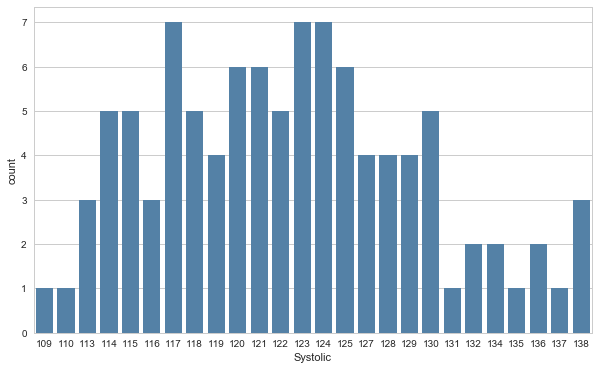

In [5]:
# distribution of output variable
sns.countplot(target, data=df, color='steelblue')

In [6]:
# split data into training, test
from sklearn.cross_validation import train_test_split

x = df_dummies
y = df[target]

# Divide the data into a training and a test set.
random_state = 0  # Fixed so that everybody has got the same split
test_set_fraction = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_set_fraction, 
                                                    random_state=random_state)

print('Size of training set: {}'.format(len(x_train)))
print('Size of test set: {}'.format(len(x_test)))

Size of training set: 80
Size of test set: 20


/Users/a149174/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn import linear_model

regr = linear_model.Lasso(alpha=0.05,)
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

# Can be used for feature selection
print('Coefficients', regr.coef_)

print(regr.score(x_test,y_test))

coef_keep = np.nonzero(regr.coef_)

Coefficients [  8.25845164e-02   7.58594340e-02   9.48714662e+00   1.31882202e-03
   0.00000000e+00  -0.00000000e+00   7.55067484e-01  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -3.21216684e+00   1.05671605e-01
  -0.00000000e+00]
0.493712547937


In [8]:
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model import LassoCV

n_lambdas = 100
lambdas = np.logspace(-1, 2, n_lambdas)
lm = linear_model.LassoCV(cv=10, alphas=lambdas)

lm.fit(x_train,y_train)

# Can be used for feature selection
print('Coefficients', lm.coef_)
print('model score', lm.score(x_test,y_test))

Coefficients [ 0.08733502  0.          8.83727768  0.01233084  0.         -0.
  0.13494262 -0.         -0.          0.         -2.03619663  0.         -0.        ]
model score 0.467682199766


In [9]:
coef_dict = {}
for coef, feat in zip(lm.coef_,list(df_dummies)):
    coef_dict[feat] = coef
coef_dict

{'Age': 0.087335022708830354,
 "Gender_'Female'": 0.0,
 "Gender_'Male'": -0.0,
 'Height': 0.0,
 "Location_'County General Hospital'": 0.13494262281020564,
 "Location_'St. Mary's Medical Center'": -0.0,
 "Location_'VA Hospital'": -0.0,
 "SelfAssessedHealthStatus_'Excellent'": 0.0,
 "SelfAssessedHealthStatus_'Fair'": -2.0361966288637796,
 "SelfAssessedHealthStatus_'Good'": 0.0,
 "SelfAssessedHealthStatus_'Poor'": -0.0,
 'Smoker': 8.8372776822693115,
 'Weight': 0.012330837984517066}

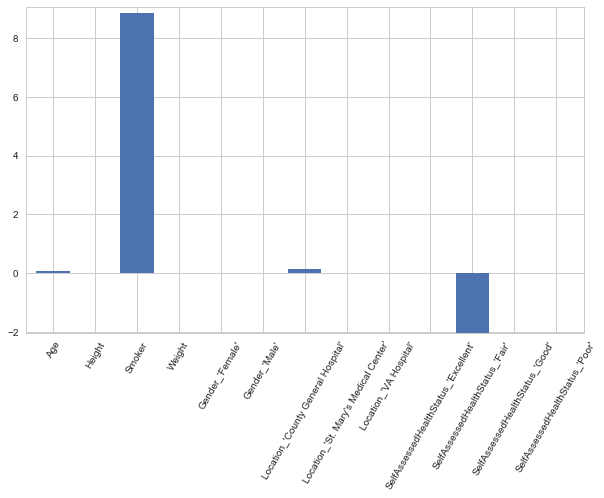

In [10]:
# Plot the coefficients
plt.bar(range(len(list(df_dummies))), lm.coef_)
plt.xticks(range(len(df_dummies)), list(df_dummies), rotation=60)
plt.margins(0.02)
plt.show()


In [ ]:
# same as above with LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from matplotlib.ticker import FormatStrFormatter

n_lambdas = 100
lambdas = np.logspace(-2, 10, n_lambdas)
coefs = []

k_fold = KFold(10)
coefs=[]
lambdas_chart=[]
model_scores=[]

for a in lambdas:
    lasso_cv = Lasso(alpha=a)
    for k, (train, test) in enumerate(k_fold.split(x_train, y_train)):
        lasso_cv.fit(x_train, y_train)
        coefs.append(lasso_cv.coef_)
        lambdas_chart.append(lasso_cv.alpha)
        model_scores.append(lasso_cv.score(x_test, y_test))

ax = plt.gca()
plt.gca()
ax.plot(lambdas_chart, coefs)
#ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(np.arange(min(lambdas_chart), max(lambdas_chart), .1))
plt.legend(x_train.columns)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

In [ ]:
feature_index = 2
print('feature:',x_train.columns[2])
coef_feature_list = []
for c in range(0,len(coefs)):
    coef_feature_list.append(coefs[c:][0][feature_index])
plt.plot(range(0,len(coefs)),coef_feature_list)

In [ ]:
print(len(lambdas_chart))
print(len(coefs))

In [ ]:
n_lambdas = 100
lambdas = np.logspace(-2, 1, n_lambdas)
print(lambdas)
plt.scatter(np.arange(100),lambdas)

In [ ]:
plt.scatter(np.arange(2000),model_scores)
print('max score on testing data', np.amax(model_scores))
itemindex = np.where(model_scores==np.amax(model_scores))
print('lambda index with top model score:', itemindex)

In [ ]:
print('optimal lambda to maximize model score', lambdas_chart[itemindex[0][0]])

In [ ]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html
import time
# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(x_train, y_train)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
#plt.axis('tight')
#plt.ylim(ymin, ymax)